<a href="https://colab.research.google.com/github/sssangeetha/OutamationAI_OCR_RAG_Automation/blob/main/OCR_imagePreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving noisy_image_sample.jpg to noisy_image_sample (8).jpg


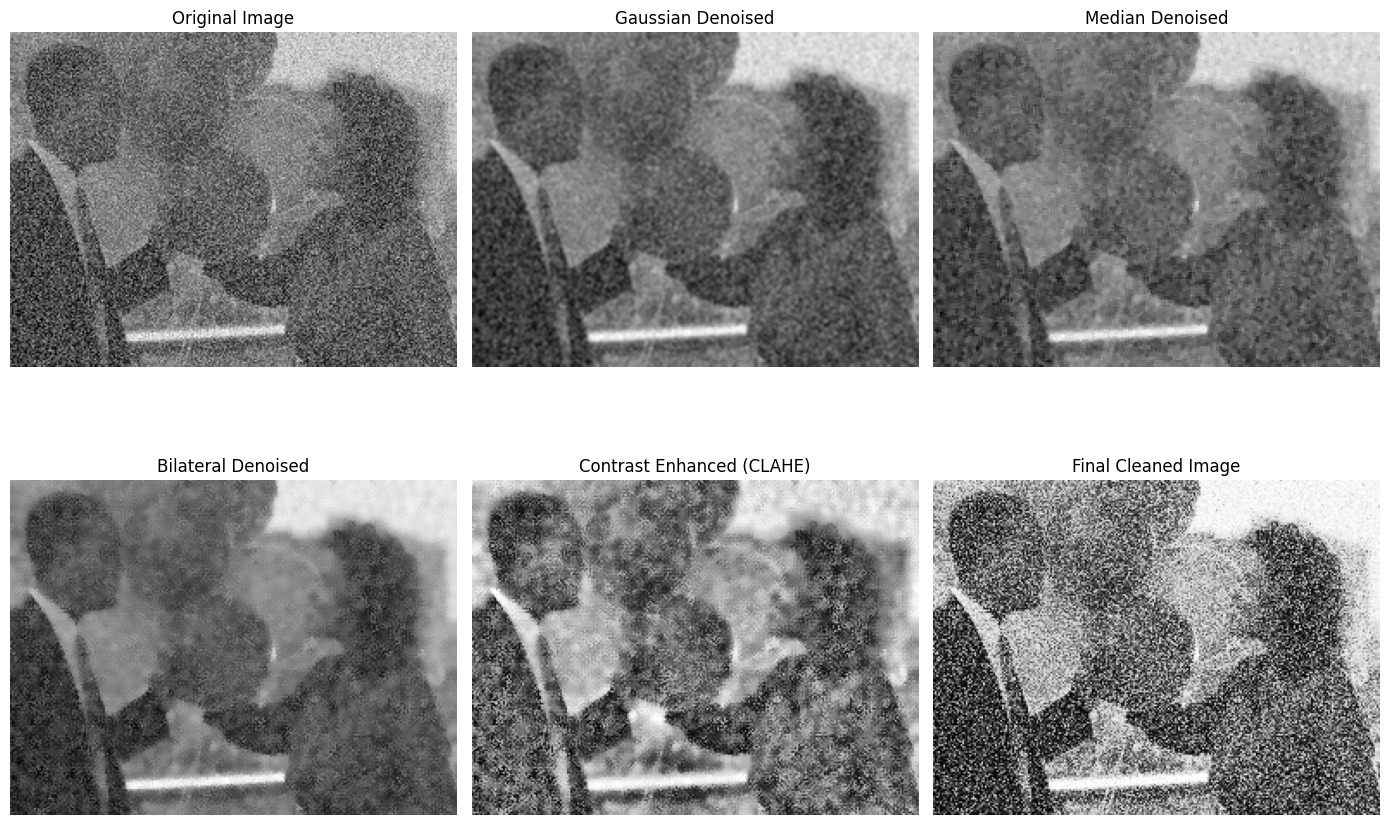

✅ Cleaned document saved as: cleaned_noisy_image_final.jpg


In [16]:
# ==============================================
# Final Fixed Image Cleaning and Preprocessing (Colab)
# ==============================================

import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload image (if not already uploaded)
uploaded = files.upload()

# Read image in grayscale
img = cv2.imread("noisy_image_sample.jpg", cv2.IMREAD_GRAYSCALE)

# Apply denoising filters
gaussian = cv2.GaussianBlur(img, (3, 3), 0)       # milder blur
median = cv2.medianBlur(img, 3)                   # smaller kernel keeps details
bilateral = cv2.bilateralFilter(img, 7, 50, 50)   # preserves text edges

# Normalize brightness before contrast enhancement
norm = cv2.normalize(bilateral, None, 0, 255, cv2.NORM_MINMAX)

#  Contrast Enhancement (CLAHE) - slightly higher clipLimit for clarity
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced = clahe.apply(norm)
# Apply Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(img, None, 30, 7, 21)

# Apply Histogram Equalization
hist_eq = cv2.equalizeHist(img)

# Save final cleaned image
cv2.imwrite("cleaned_noisy_image_final.jpg", hist_eq)

# Display all stages
titles = [
    "Original Image",
    "Gaussian Denoised",
    "Median Denoised",
    "Bilateral Denoised",
    "Contrast Enhanced (CLAHE)",
    "Final Cleaned Image"
]

images = [
    img,
    gaussian,
    median,
    bilateral,
    enhanced,
    hist_eq
]

plt.figure(figsize=(14, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

print("✅ Cleaned document saved as: cleaned_noisy_image_final.jpg")
